# Email Spam Detection using Python

The provided dataset consists of email data with three columns:

1. label: Indicates whether the email is classified as spam  or ham (non-spam). It has two possible values:
   - "ham": Indicates a non-spam email.
   - "spam": Indicates a spam email.

2. text: Contains the text content of the email.
   - This column includes the body of the email, which may contain various information such as the subject, message content, and other relevant details.

3. label_num: Represents the numerical label corresponding to the `label` column.
   - It has two values:
     - 0: Represents a non-spam email (ham).
     - 1: Represents a spam email.



The dataset contains a mixture of spam and non-spam emails, represented by the labels "ham" and "spam," respectively. The `label_num` column provides a numerical representation of the labels for model training purposes.

# Reading and Understanding of Data

Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

Loading the Dataset

In [2]:
# Loading the Dataset
df = pd.read_csv(r"C:\Users\avani\Downloads\archive (14)\spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
# Showing First 5 Rows
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# Showing Last 5 Rows
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [5]:
# Showing no. of rows and columns in the data
df.shape
# no of rows = 5171
# no. of columns = 4

(5171, 4)

In [6]:
# Showing columns of the dataset
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

# Data pre Processing 


In [7]:
# Checking null values
df.isna().sum() # no null values

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
# Checking Duplicated Values
df.duplicated().sum()

0

In [9]:
# Dropping Duplicated Values
df.drop_duplicates()
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [10]:
df.shape

(5171, 4)

In [11]:
# Statistical summary of the data
df.describe()


,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [12]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [13]:
# Dropping column
df.drop('Unnamed: 0', axis=1 , inplace=True)
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


array([[<AxesSubplot:title={'center':'label_num'}>]], dtype=object)

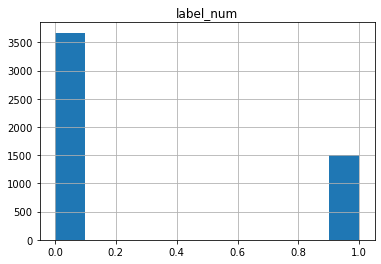

In [14]:
df.hist()

In [15]:
df['label'].value_counts() # counts the value of ham or spam label

ham     3672
spam    1499
Name: label, dtype: int64

In [16]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

## Rename the columns


In [17]:
# Renaming Column Names
df.columns = ['Category','subject','Numeric Category']

# checking for column names
df.columns

Index(['Category', 'subject', 'Numeric Category'], dtype='object')

In [18]:
# Showing Unique Values of Category column
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

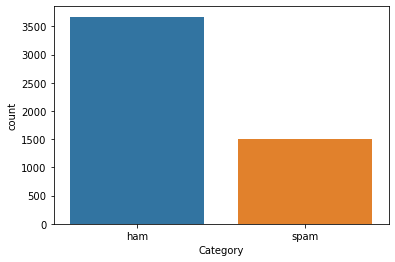

In [19]:
# Plotting Countplot for Category Column
sns.countplot(data = df , x = 'Category')
plt.show()

This Plot Clearly Shows that most of the mails are ham which means they are not spam mails.

# 2. Subject Column

Before Cleaning

In [20]:
# Showing first row of Subject column 
df['subject'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [21]:
import re

# Convert text to lowercase
df['subject'] = df['subject'].str.lower()

# Remove special characters
df['subject'] = df['subject'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [22]:
# Showing first row of Subject Column after cleaning
df['subject'][0]

'subject enron methanol  meter   988291\r\nthis is a follow up to the note i gave you on monday  4  3  00  preliminary\r\nflow data provided by daren  \r\nplease override pop  s daily volume  presently zero  to reflect daily\r\nactivity you can obtain from gas control \r\nthis change is needed asap for economics purposes '

In [23]:
# checking the data after cleaning
df.head()

,Category,subject,Numeric Category
0,ham,subject enron methanol meter 988291\r\nthis...,0
1,ham,subject hpl nom for january 9 2001\r\n see at...,0
2,ham,subject neon retreat\r\nho ho ho we re aroun...,0
3,spam,subject photoshop windows office cheap mai...,1
4,ham,subject re indian springs\r\nthis deal is to ...,0


# Separating the data as Category and Subject

In [24]:
X = df['Category']

Y = df['subject']

In [25]:
print(X)

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: Category, Length: 5171, dtype: object


In [26]:
print(Y)

0       subject enron methanol  meter   988291\r\nthis...
1       subject hpl nom for january 9  2001\r\n see at...
2       subject neon retreat\r\nho ho ho  we  re aroun...
3       subject photoshop  windows  office  cheap  mai...
4       subject re  indian springs\r\nthis deal is to ...
                              ...                        
5166    subject put the 10 on the ft\r\nthe transport ...
5167    subject 3  4  2000 and following noms\r\nhpl c...
5168    subject calpine daily gas nomination\r\n\r\n\r...
5169    subject industrial worksheets for august 2000 ...
5170    subject important online banking alert\r\ndear...
Name: subject, Length: 5171, dtype: object


In [27]:
# Preprocessing and Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['subject'])
Category = df['Numeric Category']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Category, test_size=0.30, random_state=100)
# Splitting Data into Training and Testing Sets

In [29]:
model = LogisticRegression()
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Model Training


LogisticRegression(max_iter=1000)

In [30]:
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
# Model Evaluation

Accuracy: 0.9819587628865979
Precision: 0.9596602972399151
Recall: 0.9804772234273319
F1-score: 0.9699570815450643


In [31]:
user_input = input("Enter an email: ")
new_email_vectorized = vectorizer.transform([user_input])
prediction = model.predict(new_email_vectorized)

if prediction[0] == 1:
    print("The email is predicted as spam.")
else:
    print("The email is predicted as not spam (ham).")
# User Input and Prediction

Enter an email: Subject: the bull reccomends this stokkpic yap internationa | , inc . ( ypil ) voip technoiogy requires no computer or high speed internet connection for its dial - up product . current price : $ . 23 watch this stock thursday ! some of these littie voip stocks have been realiy moving lateiy . and when some of them move , they rea | | y go . . . gains of 10 o % , 200 % or more are not unheard of . break news ! ! * yap internationa | inc . ( ypil ) announced today that it has entered into a 24 month consulting agreement with securities trading services inc . ( sts ) of geneva , switzerland . under the terms of the agreement sts wiil assist yap internationa | in accessing both equity and debt capita | for the purpose of advancing the company ? business plan reiating to its proprietary voip technology . as a resuit of the agreement with sts , yap internationa | is targeting a us dollar 5 oo , 0 oo bridge financing by way of debt , equity or a combination thereof . funds fo

1. The Mail is taken from the Dataset

In [32]:
user_input = input("Enter an email: ")
new_email_vectorized = vectorizer.transform([user_input])
prediction = model.predict(new_email_vectorized)

if prediction[0] == 1:
    print("The email is predicted as spam.")
else:
    print("The email is predicted as not spam (ham).")
# User Input and Prediction

Enter an email: Congratulations! You have been chosen for the CodersCave Internship Program🎉!  We anticipate that you will put your all into this internship program. We appreciate your patience and persistence as you dealt with concerns about the beginning of your internship. Please find an offer letter for the intern position at CodersCave attached. We are certain that you will make a significant contribution to our company, and we are excited to watch how you grow at CodersCave. Congratulations once again! We are so happy to have you as a part of our family. I hope the anticipation for your first day is as great as ours!
The email is predicted as not spam (ham).


2. this mail does not taken from the datset. this is a practice mail.